<a href="https://colab.research.google.com/github/djibril6/AI-Notebook/blob/main/DogVSCat_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author**: Djibril ISSOUFOU

In this tutorial we will build a convolutional neural network for image binary classification from scratch. Our algorithm will be able to recognize cats or dogs. For more informations about this tutorial you can check this article: https://djib-ai.com/cnn-build-your-own-image-classification-system/

## Step 1: Getting the data

We use the dogs vs cats dataset from this kaggle competition: https://www.kaggle.com/biaiscience/dogs-vs-cats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Download  the dataset from [here](https://drive.google.com/file/d/1bvqNBfJlY5V595cUuavmSRHkADJU4lOm/view?usp=sharing) and move it to your drive. 
If the link is not active you can download the dataset from the [original source](https://www.kaggle.com/biaiscience/dogs-vs-cats) and then read our tutorial [here](https://djib-ai.com/convolutional-neural-network-build-your-own-dog-and-cat-image-classification-system-from-scratch/) to reorganize the data.

In [ ]:
import os
import zipfile

In [ ]:
# we unzip the file and move the content to /tmp/cats-vs-dogs
# note that zip_path is the path to the dataset you just put in your drive
zip_path = '/content/drive/MyDrive/blog/article 1/dataset/cats-vs-dogs.zip'
zip = zipfile.ZipFile(zip_path , "r")
zip.extractall("/tmp/cats-vs-dogs")
zip.close()

In [ ]:
# We can see that the 2 train and validation folders each contain 2 folders: cat and dog
print("train directory:", os.listdir('/tmp/cats-vs-dogs/train'))
print("validation directory",os.listdir('/tmp/cats-vs-dogs/validation'))

train directory: ['dog', 'cat']
validation directory ['dog', 'cat']


## step 3: **Data** preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(rescale=1/255)

train_data = data_generator.flow_from_directory(
    '/tmp/cats-vs-dogs/train/',
    # we resize all image to 300x300
    target_size=(300, 300),
    batch_size=256,
    # we use binary class mode because we have a binary problem: cat or dog
    class_mode='binary'
)
validation_data = data_generator.flow_from_directory(
    '/tmp/cats-vs-dogs/validation/',
    target_size=(300, 300),
    batch_size=128,
    class_mode='binary'
)

Found 22000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.


## step 4: Model building

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 128)       7

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(
    optimizer=RMSprop(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

## step 5: Training

In [ ]:
history = model.fit(
    train_data,
    steps_per_epoch=86,
    epochs=15,
    verbose=1,
    validation_data=validation_data,
    validation_steps=24
)

Epoch 1/15
86/86 [==============================] - 117s 1s/step - loss: 1.5886 - accuracy: 0.5924 - val_loss: 0.8287 - val_accuracy: 0.5000
Epoch 2/15
86/86 [==============================] - 116s 1s/step - loss: 0.6639 - accuracy: 0.6241 - val_loss: 0.6885 - val_accuracy: 0.6067
Epoch 3/15
86/86 [==============================] - 116s 1s/step - loss: 0.6014 - accuracy: 0.6867 - val_loss: 0.4883 - val_accuracy: 0.7787
Epoch 4/15
86/86 [==============================] - 116s 1s/step - loss: 0.5265 - accuracy: 0.7460 - val_loss: 0.4287 - val_accuracy: 0.7997
Epoch 5/15
86/86 [==============================] - 116s 1s/step - loss: 0.4662 - accuracy: 0.7766 - val_loss: 0.4314 - val_accuracy: 0.7927
Epoch 6/15
86/86 [==============================] - 116s 1s/step - loss: 0.4135 - accuracy: 0.8100 - val_loss: 0.3922 - val_accuracy: 0.8207
Epoch 7/15
86/86 [==============================] - 115s 1s/step - loss: 0.3739 - accuracy: 0.8292 - val_loss: 0.3671 - val_accuracy: 0.8370
Epoch 8/15
86

## step 6: Model evaluation

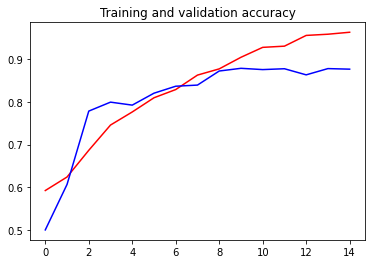

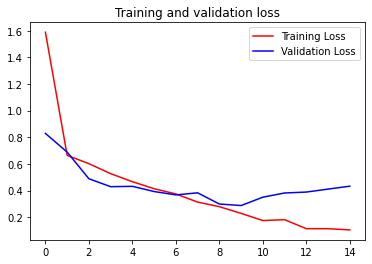

In [ ]:
import matplotlib.pyplot as plt  
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
  
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## step 7: Testing the model

In [ ]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

allupload=files.upload()

for file_name in allupload.keys():
  path='/content/' + file_name
  img=image.load_img(path, target_size=(300, 300))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  if classes[0]>0:
    print(file_name + " is a dog")
    
  else:
    print(file_name + " is a cat")

Saving cat.jpg to cat (2).jpg
Saving cat2.jpg to cat2 (1).jpg
Saving cat3.jpg to cat3 (1).jpg
Saving cat4.jpg to cat4.jpg
Saving cat5.jpg to cat5.jpg
Saving dog1.jpg to dog1.jpg
Saving dog2.jpg to dog2.jpg
Saving dog3.jpg to dog3.jpg
Saving dog4.jpg to dog4.jpg
Saving dog5.jpg to dog5.jpg
cat.jpg is a cat
cat2.jpg is a cat
cat3.jpg is a cat
cat4.jpg is a cat
cat5.jpg is a dog
dog1.jpg is a dog
dog2.jpg is a dog
dog3.jpg is a cat
dog4.jpg is a cat
dog5.jpg is a dog
